In [63]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import the necessary libraries for Preprocessing, EDA and model prediction

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import shutil

import warnings
warnings.filterwarnings('ignore')

import pickle as pkl

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Paths

In [65]:
# Path_Models_Dir = '/content/drive/MyDrive/Fiverr Temp/Stroke/Saved Models/'
# Path_Home= '/content/drive/MyDrive/Fiverr Temp/Stroke/'
# Path_Dataset = '/content/drive/MyDrive/Fiverr Temp/Stroke/Strokesdataset.csv'

# Path_Models_Dir = './Saved Models/'
Path_Home= './'
Path_Dataset = 'Strokesdataset.csv'

# Read the dataset

In [66]:
df = pd.read_csv(Path_Dataset)
# df = pd.read_csv('Strokesdataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Analysis of the Data and Checking for Nulls

In [ ]:
def Basic_Preprocessing(df):
    '''Function to perform basic preprocessing on the dataset'''
    # Calculate the percentage of missing values in each column
    missing_percentage = df.isnull().sum() / len(df) * 100

    # Print the missing percentage for each column
    print(missing_percentage)

    '''
    Missing values has been accounted for as earlier identified.
    We have a big dataset and the missing values for smoking_status is completely at random (MCAR),
    thus we can drop all rows with missing value records for 'smoking_status'
    without creating a bias
    '''
    # Drop rows with missing values in the feature column for smoking_status
    smoking_status = 'smoking_status'
    df.dropna(subset=[smoking_status], inplace=True)

    # Reset the index of the DataFrame
    df.reset_index(drop=True, inplace=True)

    # Print the resulting DataFrame with re-numbered index
    return df

def Basic_Analysis_Of_Data(df):
    '''Function for basic analysis of the dataset'''
    # To print/check the number of rows and columns in the dataset
    num_rows, num_cols = df.shape
    print(f'Number of Rows: {num_rows} \nNumber of columns: {num_cols}')

    # Dropping the column for 'id' as it is not needed for the model prediction
    df.drop(columns='id', inplace=True)

    # Getting information about the data
    # There should be 11 feature columns left now
    df.info()

    # Check for missing values
    df.isnull().sum() #We can observe here that there are missing values in bmi and smoking_status columns. We will confirm this in the next kernel and it would be attended to in the data wrangling stage going forward.
    return df

df = Basic_Analysis_Of_Data(df)
df = Basic_Preprocessing(df)
df

# Now let's delve deeper into the data to have a better insight, after the basic analysis and processing

In [ ]:
df = Basic_Analysis_Of_Data(df)

In [74]:
# Show first 5 rows
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [75]:
# Show last 5 rows
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30103,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
30104,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
30105,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
30106,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
30107,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [ ]:
def Get_Mathematical_Statistics(df):
    '''Function to get the mathematical statistics of the dataset'''
    # Get the mathematical statistics of the dataset
    print(round(df.describe(),2))

    # Get the statistics of the categorical variables
    round(df.describe(exclude=['int64', 'float64']), 2)

Get_Mathematical_Statistics(df)

In [80]:
# To get all column names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: >

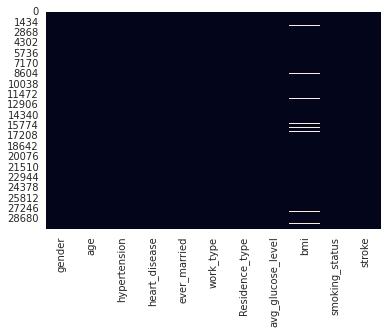

In [81]:
#Visualize the missing data using heatmap
sns.heatmap(df.isnull(), cbar = False)

# The Heatmap further confirms that there are missing values only in the bmi feature column and there would be a need to take care of the missing values as well.
# Now we need to fill in the missing values by replacing it with the mean of bmi column

In [ ]:
def Dealing_With_Nulls(df):
    #fill in the missing values by replacing it with the mean of the bmi column
    df['bmi'].replace(np.NaN, df['bmi'].mean(), inplace=True)

    # Check to confirm there are no missing values in the dataset
    df.isnull().sum() # Missing values has been dealt with, now check for duplicates

    return df

def Dealing_With_Duplicates(df):
    # Check for duplicates
    df.duplicated().sum()

df = Dealing_With_Nulls(df)
Dealing_With_Duplicates(df)

# Missing values has been dealt with, now check for duplicates

# Now let's check for unique values in all the columns

In [85]:
# let's check to know the number of unique values in each column
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].unique().shape[0]

pd.DataFrame(unique_values, index=['NO of unique values']).transpose()

,NO of unique values
gender,3
age,73
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,11284
bmi,517
smoking_status,3


In [86]:
columns = ['gender', 'ever_married','work_type', 'Residence_type','smoking_status']
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for gender:['Male' 'Female' 'Other']
Unique values for ever_married:['Yes' 'No']
Unique values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type:['Urban' 'Rural']
Unique values for smoking_status:['never smoked' 'formerly smoked' 'smokes']


In [87]:
# Check for the counts in each gender category, for insights
df['gender'].value_counts()

Female    18366
Male      11733
Other         9
Name: gender, dtype: int64

In [88]:
# The 'Other' category has only 9 records, this is not significant and can be added to the 'Male' category
# to improve the spread
df['gender'] = df['gender'].replace('Other', 'Male')
df['gender'].value_counts()

Female    18366
Male      11742
Name: gender, dtype: int64

# Collinearity checks

In [ ]:
def Collinearity_checks(df):
    # Checking for correlation among the numerical columns
    correlation = df.select_dtypes('number').corr()
    print(correlation)

    #visualise the correlation using a heatmap
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='Greens', linewidths=0.5)

    # Set the title and labels for the plot
    plt.title('Correlation Matrix')
    plt.xlabel('Features')
    plt.ylabel('Features')

    # Display the plot
    plt.show()

Collinearity_checks(df)

# There's no correlation worth of note.

# Outlier Detection / Now let's check for outliers

<Figure size 7560x5760 with 0 Axes>

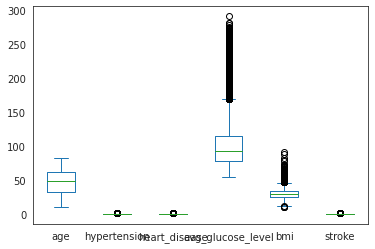

In [91]:
plt.figure(num=None, figsize=(8.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
df.plot(kind='box')
plt.show();

# There are outliers in avg_glucose_level and bmi columns

In [92]:
df['avg_glucose_level'].describe()

count    30108.000000
mean       107.188866
std         45.963166
min         55.010000
25%         77.837500
50%         92.395000
75%        114.492500
max        291.050000
Name: avg_glucose_level, dtype: float64

In [93]:
(df['avg_glucose_level'] > 125).value_counts()

False    24021
True      6087
Name: avg_glucose_level, dtype: int64

In [94]:
df['bmi'].describe()

count    30108.000000
mean        30.054166
std          7.069051
min         10.100000
25%         25.100000
50%         29.300000
75%         33.600000
max         92.000000
Name: bmi, dtype: float64

In [95]:
(df['bmi']>30).value_counts()

False    16419
True     13689
Name: bmi, dtype: int64

## We can infer here to keep the outliers as it is possible to have an avg_glucose level of 125mg/cl and bmi above 30kg based on diabetes and obese patients respectively

# Feature Engineering
### Let's group our continuous categorical variables (age, bmi, avg_glucose_level) into categories

### Category 1: Age Group

In [96]:
# Checking for max, min, and number of unique age variables
print(f'Maximum age variable: {df["age"].max()}')
print(f'Minimum age variable: {df["age"].min()}')
print(f'Number of age variables: {df["age"].nunique()}')

Maximum age variable: 82.0
Minimum age variable: 10.0
Number of age variables: 73


In [97]:
# Group age by class
ranges = [0, 13, 18, 45, 60, 100]
group_names = ['Children', 'Teens', 'Adults', 'Mid-Adults', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=ranges, labels=group_names)
df['age_group'].unique()

['Mid-Adults', 'Elderly', 'Adults', 'Teens', 'Children']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid-Adults' < 'Elderly']

### Category 2: Bmi Group

In [98]:
# Checking for max, min, and number of unique bmi variables
print(f'Maximum bmi variable: {df["bmi"].max()}')
print(f'Minimum bmi variable: {df["bmi"].min()}')
print(f'Number of bmi variables: {df["bmi"].nunique()}')

Maximum bmi variable: 92.0
Minimum bmi variable: 10.1
Number of bmi variables: 517


In [99]:
# Group by bmi class
ranges = [0, 19, 25, 30, 100]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['bmi_group'] = pd.cut(df['bmi'], bins=ranges, labels=group_names)
df['bmi_group'].unique()

['Obesity', 'Underweight', 'Overweight', 'Normal']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

### Category 3: Avg_glucose_level Group

In [100]:
# Checking for max, min, and number of unique avg_glucose_level variables
print(f'Maximun avg_glucose_level variable: {df["avg_glucose_level"].max()}')
print(f'Minimun avg_glucose_level variable: {df["avg_glucose_level"].min()}')
print(f'Number of avg_glucose_level variable: {df["avg_glucose_level"].nunique()}')

Maximun avg_glucose_level variable: 291.05
Minimun avg_glucose_level variable: 55.01
Number of avg_glucose_level variable: 11284


In [101]:
# Group by avg_glucose_level class
ranges= [0, 70, 99, 125, 280]
group_names= ['Low', 'Normal', 'High', 'Very_high']
df['avg_glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins=ranges, labels=group_names)
df['avg_glucose_level_group'].unique()

['Normal', 'Low', 'Very_high', 'High', NaN]
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very_high']

# EDA:
## Now let's explore and analyse the data

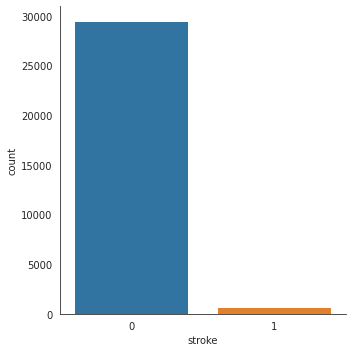

In [102]:
#let's visualize stroke column to gain insight of our target veriable
sns.catplot(data=df, x='stroke', kind='count')
sns.set_style('white')
plt.show()

In [103]:
# Now let's display the count of each unique value in the "stroke" column
df['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

### From observation, it is clear to see inbalance in the data. This will be fixed during modeling by balancing the class weights.

# Relationship between Age and Stroke

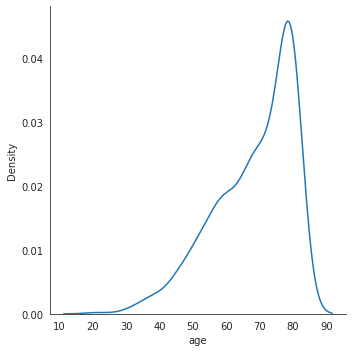

In [104]:
# To visualise the relationship between age and stroke
stroke = df[df['stroke']==1]
sns.displot(stroke['age'], kind='kde')
sns.set_style('darkgrid')
plt.show()

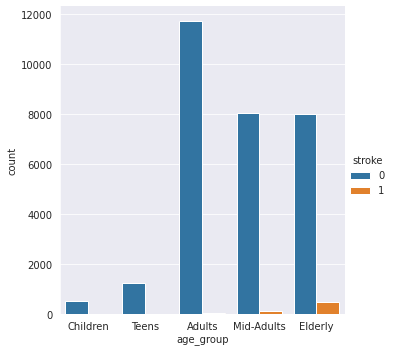

In [105]:
# Visualise across age group for a better insight
sns.catplot(data=df, x='age_group', hue='stroke', kind='count')
sns.set_style('white')
plt.show();

### We can observe here that stroke risk increases with age

# Relationship between BMI and Stroke

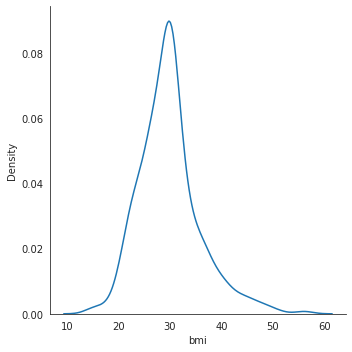

In [106]:
# To visualise the relationship between bmi and stroke
stroke = df[df['stroke']==1]
sns.displot(stroke['bmi'], kind='kde')
sns.set_style('darkgrid')
plt.show()

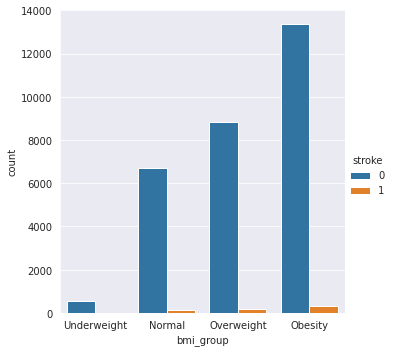

In [107]:
# Visualise across bmi group for a better insight
sns.catplot(data=df, x='bmi_group', kind='count', hue='stroke')
sns.set_style('white')
plt.show()

### We can also observe here that stroke risk increases proportionally as bmi group increases

# Relationship between Avg_Glucose_Level and Stroke

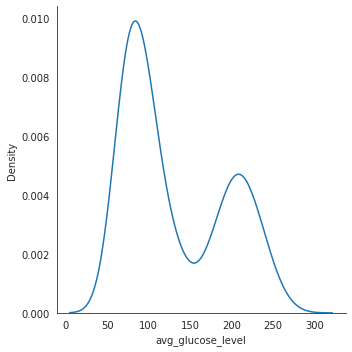

In [108]:
# To visualize the relationship between avg_glucose_level and stroke
stroke = df[df['stroke']==1]
sns.displot(stroke['avg_glucose_level'], kind='kde')
sns.set_style('darkgrid')
plt.show()

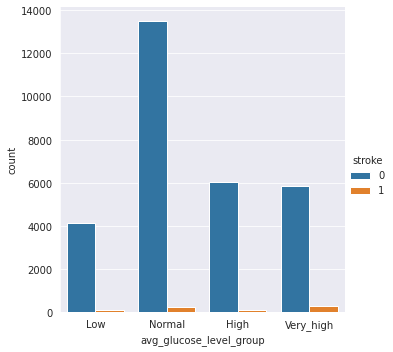

In [109]:
# Visualise across avg_glucose_level group for a better insight
sns.catplot(data=df, x='avg_glucose_level_group', kind='count', hue='stroke')
sns.set_style('white')
plt.show();

### The relationship between avg_glucose_level and stroke is observed to be wavery and uneven

### Let's check the relationship amongst the grouped continuous categorical variables ie categories 1,2 & 3 (age, bmi, avg_glucose_level)

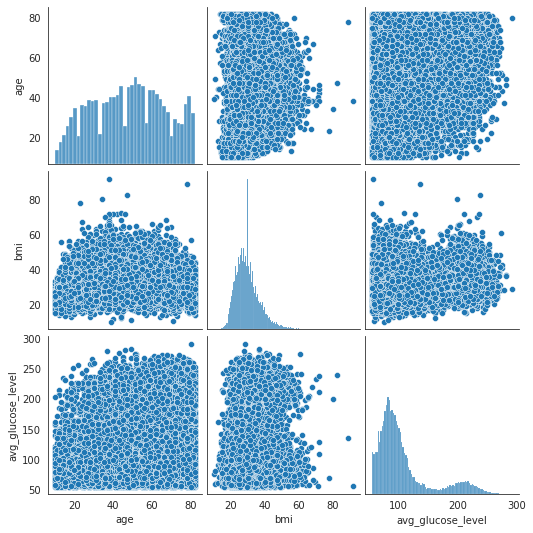

In [110]:
#Visualise the relationships within age, bmi and avg_glucose_level
columns= ['age', 'bmi', 'avg_glucose_level']
sns.pairplot(df[columns])
plt.show()

### From observations, there is no noteworthy relationship between these features (age, bmi and avg_glucose_level)

In [111]:
# Display the summary information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30108 entries, 0 to 30107
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   30108 non-null  object  
 1   age                      30108 non-null  float64 
 2   hypertension             30108 non-null  int64   
 3   heart_disease            30108 non-null  int64   
 4   ever_married             30108 non-null  object  
 5   work_type                30108 non-null  object  
 6   Residence_type           30108 non-null  object  
 7   avg_glucose_level        30108 non-null  float64 
 8   bmi                      30108 non-null  float64 
 9   smoking_status           30108 non-null  object  
 10  stroke                   30108 non-null  int64   
 11  age_group                30108 non-null  category
 12  bmi_group                30108 non-null  category
 13  avg_glucose_level_group  30105 non-null  category
dtypes: cat

In [112]:
columns = ['gender', 'ever_married','work_type', 'Residence_type','smoking_status']
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique_values for {column}:{unique_values}")

Unique_values for gender:['Male' 'Female']
Unique_values for ever_married:['Yes' 'No']
Unique_values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique_values for Residence_type:['Urban' 'Rural']
Unique_values for smoking_status:['never smoked' 'formerly smoked' 'smokes']


# Saving all Unique Values that will be used in GUI

In [113]:
def Get_Save_Unique_Values(df):
    df = df.dropna()
    #get unique values of each column in a dict
    unique_values = {}
    for col in df.columns:
        unique_values[col] = list(np.unique(df[col]))
    print(unique_values)
    np.save(os.path.join(Path_Home,'unique_values.npy'), unique_values)
    return df

df = Get_Save_Unique_Values(df)

# One-Hot Encoding

In [120]:
# One-Hot Encoding(encoding object columns with 2 unique values)
binary_cols = ['ever_married', 'Residence_type', 'gender','age_group', 'bmi_group', 'avg_glucose_level_group']
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    pkl.dump(le, open(os.path.join(Path_Models_Dir,'LabelEncoder_'+str(col)+'.pkl'), 'wb'))
df

In [122]:
#Encode object columns that more than 2 unique values
# Create a list of object columns with more than 2 unique values
cols_to_encode = ['work_type', 'smoking_status']

# Apply one-hot encoding to the selected object columns
df = pd.get_dummies(df, columns=cols_to_encode)

df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,avg_glucose_level_group,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,58.0,1,0,1,1,87.96,39.2,0,3,1,2,0,0,1,0,0,0,1,0
1,0,70.0,0,0,1,0,69.04,35.9,0,2,1,1,0,0,1,0,0,1,0,0
2,0,52.0,0,0,1,1,77.59,17.7,0,3,3,2,0,0,1,0,0,1,0,0
3,0,75.0,0,1,1,0,243.53,27.0,0,2,2,3,0,0,0,1,0,0,1,0
4,0,32.0,0,0,1,0,77.67,32.3,0,0,1,2,0,0,1,0,0,0,0,1


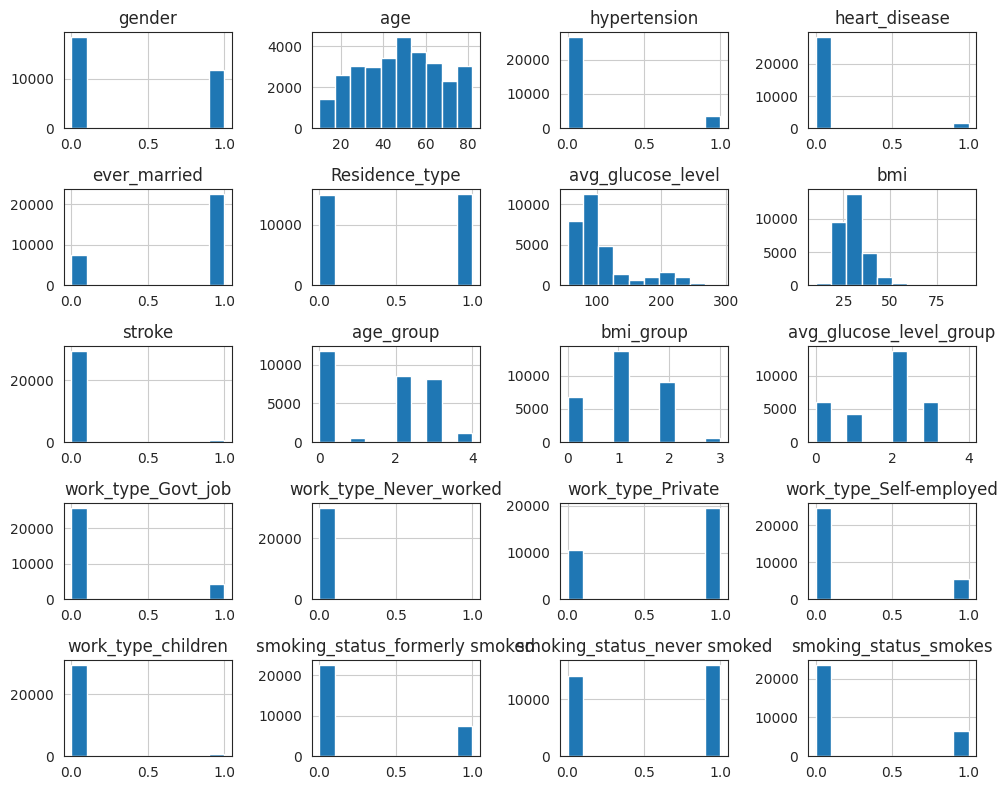

In [ ]:
# Plot histograms to visualise all numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()

# Display the plots
plt.show()

# Modeling:

### Train Test Split into 80%/20% to prevent Data Leakages

In [ ]:
# Create feature
X = df.drop('stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,avg_glucose_level_group,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,58.0,1,0,1,1,87.96,39.2,3,1,2,0,0,1,0,0,0,1,0
1,0,70.0,0,0,1,0,69.04,35.9,2,1,1,0,0,1,0,0,1,0,0
2,0,52.0,0,0,1,1,77.59,17.7,3,3,2,0,0,1,0,0,1,0,0
3,0,75.0,0,1,1,0,243.53,27.0,2,2,3,0,0,0,1,0,0,1,0
4,0,32.0,0,0,1,0,77.67,32.3,0,1,2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30103,0,10.0,0,0,0,1,58.64,20.4,1,0,1,0,0,0,0,1,0,1,0
30104,0,56.0,0,0,1,1,213.61,55.4,3,1,3,1,0,0,0,0,1,0,0
30105,0,82.0,1,0,1,1,91.94,28.9,2,2,2,0,0,1,0,0,1,0,0
30106,1,40.0,0,0,1,1,99.16,33.2,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# Create the target variable
y = df['stroke']
y

0        0
1        0
2        0
3        0
4        0
        ..
30103    0
30104    0
30105    0
30106    0
30107    0
Name: stroke, Length: 30108, dtype: int64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((24086, 19), (6022, 19), (24086,), (6022,))

# Normalization

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Machine Learning Algorithms:

### 1). Random Forest

In [ ]:
# To perform hyperparameter tunning for the model
# Create a RandomForestClassifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced')

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [None, 5, 10],                # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None],    # Maximum number of features to consider at each split
    'random_state': [0, 42]                    # Random seed for reproducibility
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)  # cv=5 indicates 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [ ]:
# Instantiate the RandomForestClassifier with the chosen hyperparameters
# rfc = RandomForestClassifier(max_depth=None, max_features='sqrt', n_estimators=100, random_state=42)
rfc = RandomForestClassifier(**grid_search.best_params_)

# Fit the RandomForestClassifier on the training data
rfc.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = rfc.predict(X_test)

In [ ]:
pkl.dump(rfc, open(os.path.join(Path_Models_Dir,'Random Forest.pkl'), 'wb'))

In [ ]:
# Calculate the accuracy score of the RandomForestClassifier predictions
rfc_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Random Forest Classifier Accuracy:", rfc_accuracy)

Random Forest Classifier Accuracy: 0.9779143141813351


In [ ]:
# Evaluate the train set accuracy of the RandomForestClassifier
rfc_train_accuracy = rfc.score(X_train, y_train)

# Print the train set accuracy
print("Random Forest Classifier Train Set Accuracy:", rfc_train_accuracy)

Random Forest Classifier Train Set Accuracy: 1.0


In [ ]:
# Evaluate the test set accuracy of the trained RandomForestClassifier
rfc_test_accuracy = rfc.score(X_test, y_test)

# Print the test set accuracy
print("Random Forest Classifier Test Set Accuracy:", rfc_test_accuracy)

Random Forest Classifier Test Set Accuracy: 0.9779143141813351


### 2). Logistic Regression

In [ ]:
# Create a LogisticRegression model with balanced class weights
log_reg = LogisticRegression(class_weight='balanced')

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],                    # Regularization parameter
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],      # Type of regularization penalty
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Optimization algorithm
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)  # cv=5 indicates 5-fold cross-validation
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)

Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
# Instantiate the Logistic Regression model with the specified hyperparameters
# log_reg = LogisticRegression(C=1.0, penalty='l1', solver='saga', class_weight='balanced')
log_reg = LogisticRegression(**grid_search.best_params_)

# Fit the Logistic Regression model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict the target values on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Print the predicted target values
print("Predicted Target Values (y_pred):", y_pred)

Predicted Target Values (y_pred): [0 0 0 ... 0 0 0]


In [ ]:
pkl.dump(log_reg, open(os.path.join(Path_Models_Dir,'Logistic Regression.pkl'), 'wb'))

In [ ]:
# Calculate the accuracy score of the Logistic Regression predictions
log_reg_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.9780803719694454


In [ ]:
# Evaluate the train set accuracy of the trained Logistic Regression model
log_reg_train_accuracy = log_reg.score(X_train_scaled, y_train)

# Print the train set accuracy
print("Logistic Regression Train Set Accuracy:", log_reg_train_accuracy)

Logistic Regression Train Set Accuracy: 0.9789919455285228


In [ ]:
# Evaluate the test set accuracy of the trained Logistic Regression model
log_reg_test_accuracy = log_reg.score(X_test_scaled, y_test)

# Print the test set accuracy
print("Logistic Regression Test Set Accuracy:", log_reg_test_accuracy)

Logistic Regression Test Set Accuracy: 0.9780803719694454


### 3). Decision Tree

In [ ]:
# Create a DecisionTreeClassifier with balanced class weights
dt = DecisionTreeClassifier(class_weight='balanced')

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],                # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],                 # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4],               # Minimum number of samples required to be at a leaf node
    'random_state': [0, 42]                         # Random seed for reproducibility
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)   # cv=5 indicates 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("Best Hyperparameters for Decision Tree Classifier:")
print(grid_search.best_params_)

Best Hyperparameters for Decision Tree Classifier:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
# Instantiate the DecisionTreeClassifier with the specified hyperparameters
# dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=2, random_state=0)
dt = DecisionTreeClassifier(**grid_search.best_params_)

# Fit the DecisionTreeClassifier on the training data
dt.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = dt.predict(X_test)

# Print the predicted target values
print("Predicted Target Values (y_pred):", y_pred)

Predicted Target Values (y_pred): [0 0 0 ... 0 0 0]


In [ ]:
pkl.dump(dt, open(os.path.join(Path_Models_Dir,'Decision Tree.pkl'), 'wb'))

In [ ]:
# Calculate the accuracy score of the DecisionTreeClassifier predictions
dt_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.9780803719694454


In [ ]:
# Evaluate the train set accuracy of the trained DecisionTreeClassifier model
dt_train_accuracy = dt.score(X_train, y_train)

# Print the train set accuracy
print("Decision Tree Classifier Train Set Accuracy:", dt_train_accuracy)

Decision Tree Classifier Train Set Accuracy: 0.9789919455285228


In [ ]:
# Evaluate the test set accuracy of the trained DecisionTreeClassifier model
dt_test_accuracy = dt.score(X_test, y_test)

# Print the test set accuracy
print("Decision Tree Classifier Test Set Accuracy:", dt_test_accuracy)

Decision Tree Classifier Test Set Accuracy: 0.9780803719694454


### 4). Long Short-Term Memory (LSTM)

In [ ]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2, input_shape=(X_train.shape[1], 1)):
    model = Sequential()
    model.add(LSTM(units, dropout=dropout_rate, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the LSTM model as a KerasClassifier
best_epochs = 10
best_batch_size = 16
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'units': [50, 100, 150],               # Number of LSTM units
    'dropout_rate': [0.2, 0.3, 0.4],       # Dropout rate to prevent overfitting
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lstm_model, dict(param_grid), cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("Best Hyperparameters for LSTM Model:")
print(grid_result.best_params_)

Best Hyperparameters for LSTM Model:
{'dropout_rate': 0.2, 'units': 50}


In [ ]:
# Instantiate the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, dropout=0.2, input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the LSTM model on the training data
lstm_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Predict the target values on the scaled test data
y_pred = lstm_model.predict(X_test_scaled)

# Print the predicted target values
print("Predicted Target Values (y_pred):", y_pred)

Epoch 1/10
753/753 [==============================] - 8s 9ms/step - loss: 0.1160 - accuracy: 0.9777
Epoch 2/10
753/753 [==============================] - 7s 10ms/step - loss: 0.0967 - accuracy: 0.9790
Epoch 3/10
753/753 [==============================] - 7s 9ms/step - loss: 0.0959 - accuracy: 0.9790
Epoch 4/10
753/753 [==============================] - 8s 10ms/step - loss: 0.0952 - accuracy: 0.9790
Epoch 5/10
753/753 [==============================] - 8s 11ms/step - loss: 0.0947 - accuracy: 0.9790
Epoch 6/10
753/753 [==============================] - 7s 9ms/step - loss: 0.0951 - accuracy: 0.9790
Epoch 7/10
753/753 [==============================] - 7s 10ms/step - loss: 0.0940 - accuracy: 0.9790
Epoch 8/10
753/753 [==============================] - 7s 9ms/step - loss: 0.0938 - accuracy: 0.9790
Epoch 9/10
753/753 [==============================] - 7s 10ms/step - loss: 0.0939 - accuracy: 0.9790
Epoch 10/10
189/189 [==============================] - 1s 3ms/step
Predicted Target Values (y_p

In [ ]:
pkl.dump(lstm_model, open(os.path.join(Path_Models_Dir,'LSTM.pkl'), 'wb'))

In [ ]:
# Calculate the accuracy score of the LSTM model predictions
lstm_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

# Print the accuracy score
print("LSTM Model Accuracy:", lstm_accuracy)

LSTM Model Accuracy: 0.9780803719694454


In [ ]:
# Evaluate the train set accuracy of the LSTM model
_, lstm_train_accuracy = lstm_model.evaluate(X_train_scaled, y_train)

# Print the train set accuracy
print("LSTM Model Train Set Accuracy:", lstm_train_accuracy)

753/753 [==============================] - 3s 3ms/step - loss: 0.0914 - accuracy: 0.9790
LSTM Model Train Set Accuracy: 0.9789919257164001


In [ ]:
# Evaluate the test set accuracy of the LSTM model
_, lstm_test_accuracy = lstm_model.evaluate(X_test_scaled, y_test)

# Print the test set accuracy
print("LSTM Model Test Set Accuracy:", lstm_test_accuracy)

189/189 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9781
LSTM Model Test Set Accuracy: 0.9780803918838501


### 5). Recurrent Neural Network (RNN)

In [ ]:
# Import libraries
from tensorflow.keras.layers import SimpleRNN, Dense

# Define a function to create the RNN model
def create_rnn_model(units=50, dropout_rate=0.2, input_shape=(X_train.shape[1], 1)):
    model = Sequential()
    model.add(SimpleRNN(units, dropout=dropout_rate, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the RNN model as a KerasClassifier
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameter grid for the GridSearchCV
param_grid = {
    'units': [50, 100, 150],               # Number of RNN units
    'dropout_rate': [0.2, 0.3, 0.4],       # Dropout rate to prevent overfitting
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rnn_model, param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV
print("Best Hyperparameters for RNN Model:")
print(grid_result.best_params_)

Best Hyperparameters for RNN Model:
{'dropout_rate': 0.2, 'units': 50}


In [ ]:
# Instantiate the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, dropout=0.2, input_shape=(X_train_scaled.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the RNN model on the training data
rnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Predict the target values on the scaled test data
y_pred = rnn_model.predict(X_test_scaled)

# Print the predicted target values
print("Predicted Target Values (y_pred):", y_pred)

Epoch 1/10
753/753 [==============================] - 4s 4ms/step - loss: 0.1166 - accuracy: 0.9719
Epoch 2/10
753/753 [==============================] - 3s 4ms/step - loss: 0.1022 - accuracy: 0.9785
Epoch 3/10
753/753 [==============================] - 3s 4ms/step - loss: 0.0990 - accuracy: 0.9786
Epoch 4/10
753/753 [==============================] - 4s 5ms/step - loss: 0.0967 - accuracy: 0.9790
Epoch 5/10
753/753 [==============================] - 3s 4ms/step - loss: 0.0944 - accuracy: 0.9790
Epoch 6/10
753/753 [==============================] - 3s 4ms/step - loss: 0.0952 - accuracy: 0.9790
Epoch 7/10
753/753 [==============================] - 3s 4ms/step - loss: 0.0940 - accuracy: 0.9790
Epoch 8/10
753/753 [==============================] - 4s 5ms/step - loss: 0.0950 - accuracy: 0.9790
Epoch 9/10
753/753 [==============================] - 3s 4ms/step - loss: 0.0942 - accuracy: 0.9790
Epoch 10/10
189/189 [==============================] - 0s 2ms/step
Predicted Target Values (y_pred):

In [ ]:
pkl.dump(rnn_model, open(os.path.join(Path_Models_Dir,'RNN.pkl'), 'wb'))

In [ ]:
# Calculate the accuracy score of the RNN model predictions
rnn_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

# Print the accuracy score
print("RNN Model Accuracy:", rnn_accuracy)

RNN Model Accuracy: 0.9780803719694454


In [ ]:
# Evaluate the train set accuracy of the RNN model
_, rnn_train_accuracy = rnn_model.evaluate(X_train_scaled, y_train)

# Print the train set accuracy
print("RNN Model Train Set Accuracy:", rnn_train_accuracy)

753/753 [==============================] - 2s 2ms/step - loss: 0.0933 - accuracy: 0.9790
RNN Model Train Set Accuracy: 0.9789919257164001


In [ ]:
# Evaluate the test set accuracy of the RNN model
_, rnn_test_accuracy = rnn_model.evaluate(X_test_scaled, y_test)

# Print the test set accuracy
print("RNN Model Test Set Accuracy:", rnn_test_accuracy)

189/189 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9781
RNN Model Test Set Accuracy: 0.9780803918838501


# Saving best accuracy model using pickle

In [ ]:
All_Accs = [rfc_accuracy, log_reg_accuracy, dt_accuracy, lstm_accuracy, rnn_accuracy]
print('All_Accs:', All_Accs)

Best_Model = np.argmax(All_Accs)
if Best_Model == 0:
    print('Best Model: RandomForestClassifier')
    pkl.dump(rfc, open(os.path.join(Path_Models_Dir,'Best_Model_RFC.pkl'), 'wb'))
elif Best_Model == 1:
    print('Best Model: LogisticRegression')
    pkl.dump(log_reg, open(os.path.join(Path_Models_Dir,'Best_Model_LogReg.pkl'), 'wb'))
elif Best_Model == 2:
    print('Best Model: DecisionTreeClassifier')
    pkl.dump(dt, open(os.path.join(Path_Models_Dir,'Best_Model_DT.pkl'), 'wb'))
elif Best_Model == 3:
    print('Best Model: LSTM')
    pkl.dump(lstm_model, open(os.path.join(Path_Models_Dir,'Best_Model_LSTM.pkl'), 'wb'))
elif Best_Model == 4:
    print('Best Model: RNN')
    pkl.dump(rnn_model, open(os.path.join(Path_Models_Dir,'Best_Model_RNN.pkl'), 'wb'))

All_Accs: [0.9779143141813351, 0.9780803719694454, 0.9780803719694454, 0.9780803719694454, 0.9780803719694454]
Best Model: LogisticRegression


In [ ]:
# Save the scaler to a file
with open(os.path.join(Path_Models_Dir,'scaler.pkl'), 'wb') as f:
    pkl.dump(scaler, f)